# Part 1. Lists, dictionaries, tuples and Pandas

In this Deepnote, we will revise complex data structures by learning how to turn them into Pandas data frames.

You can make data frames and series from any Python data structure. 

Data frames are rectangular, they look like spreadsheets.

Series are one-dimensional. To make it easier think of a series as one column in a data frame.

In [1]:
import pandas as pd

## Making series from lists 👇🏼

In [2]:
rates = [20, 30, 50, 40, 100] # makes a list
rates_into_Series = pd.Series(rates) # converts a list to series
rates_into_Series # prints series: a overtical column with numeric indexes

0     20
1     30
2     50
3     40
4    100
dtype: int64

In [3]:
rates_into_Series.dtype # gets the type of values in a column, an attribute 👇🏼 the data in the column are integers

dtype('int64')

## Making series from tuples 👇🏼

In [4]:
# First we need to make a tuple 👇🏼
data_tuple = ('Jeff Bezos', 'Elon Musk', 'Bernard Arnault', 'Bill Gates', 'Warren Buffett')
type(data_tuple)

tuple

> reminder - a tuple is a data structure that is immutable

In [5]:
# data_tuple[2] = "V. Putin" - we cannot overwrite a value in a tuple

In [6]:
series_from_tuple = pd.Series(data_tuple) # converts a tuple into series
series_from_tuple

0         Jeff Bezos
1          Elon Musk
2    Bernard Arnault
3         Bill Gates
4     Warren Buffett
dtype: object

In [7]:
type(series_from_tuple) # checking the type - it is now a series

pandas.core.series.Series

## Making a data frame from 2 series

In [8]:
len(rates) # making sure 2 series are of the same length

5

In [9]:
len(data_tuple) # making sure 2 series are of the same length

5

## Make a data frame from several of Series

There are many ways to combine Series into a data frame. I chose the one I thought was the easiest.

In [10]:
df = pd.DataFrame(columns = ['Names', 'Rates']) # makes an empty data frame

df['Names'] = series_from_tuple # assigns a series to a column
df['Rates'] = rates_into_Series # assigns a series to a column
df # weee - we made a dataframe from scratch

,Names,Rates
0,Jeff Bezos,20
1,Elon Musk,30
2,Bernard Arnault,50
3,Bill Gates,40
4,Warren Buffett,100


## Making series from a dictionary 👇🏼

In [11]:
# first we make a very simple dictionary
data_dict = {"Apple": "fruit", "Cat": "animal", "Putin":"war criminal"}

In [12]:
print(type(data_dict))

<class 'dict'>


In [13]:
series_from_dict = pd.Series(data=data_dict)

In [14]:
series_from_dict # Series based on dictionaries have named keys

Apple           fruit
Cat            animal
Putin    war criminal
dtype: object

## We can make data frames from dictionaries with lists as values

In [15]:
new_dict = {"Fruits": ["apple", "banana", "tomato"], "Amount":[3,5,6]}

In [16]:
df2 = pd.DataFrame(new_dict)
df2

,Fruits,Amount
0,apple,3
1,banana,5
2,tomato,6


In [17]:
df3 = pd.DataFrame(data_dict, index=[0]) # we can also convert a dictionary into a data frame

df3

,Apple,Cat,Putin
0,fruit,animal,war criminal


## 🏋️🏋️ In pairs or individually:

1. Make data frames from either lists or dictionaries. Make one column city, other one population. Find data on Wikipedia.

## 🏋️🏋️ A solution to excercise one

In [18]:
populations = {"Cities": ["london", "moscow", "austin", "maiami"], "Populations": ["8.982 million", "12,641,000", "2,176,000", "6,215,000"]}

As the task was to find the data on Wikipedia I simply copied and pasted what I have found. Guess what. The data I pasted was not numeric. So, I will show how I made the data frame and also how I cleaned it.

In [19]:
import pandas as pd # importing just in case people want to run just this cell
pop_df = pd.DataFrame(populations) # made a data frame
pop_df #print my data frame

,Cities,Populations
0,london,8.982 million
1,moscow,"12,641,000"
2,austin,"2,176,000"
3,maiami,"6,215,000"


So, now I am going to make the data frame useful, too.

In [20]:
help(pd.DataFrame.dtypes) # I forgot how to use dtypes so asking Python to help

Help on property:

    Return the dtypes in the DataFrame.
    
    This returns a Series with the data type of each column.
    The result's index is the original DataFrame's columns. Columns
    with mixed types are stored with the ``object`` dtype. See
    :ref:`the User Guide <basics.dtypes>` for more.
    
    Returns
    -------
    pandas.Series
        The data type of each column.
    
    Examples
    --------
    >>> df = pd.DataFrame({'float': [1.0],
    ...                    'int': [1],
    ...                    'datetime': [pd.Timestamp('20180310')],
    ...                    'string': ['foo']})
    >>> df.dtypes
    float              float64
    int                  int64
    datetime    datetime64[ns]
    string              object
    dtype: object



In [21]:
pop_df.dtypes # checking the data type of all columns. All strings

Cities         object
Populations    object
dtype: object

All cells in the column Populations are strings. But some also have words. I am going to try and replace the word million with 000. But first I want to use regex to see how to pick up cell with the word million in it.

In [22]:
pop_df['Populations'].str.match(r'\w')==True # all cells match \w because , is alos \w

0    True
1    True
2    True
3    True
Name: Populations, dtype: bool

In [23]:
pop_df['Populations'].str.match(r'.*million.*')==True # using regex to see

0     True
1    False
2    False
3    False
Name: Populations, dtype: bool

In [36]:
pop_df['Populations'] = pop_df['Populations'].str.replace('million', ', 000')

In [37]:
pop_df

,Cities,Populations
0,london,"8.982 , 000"
1,moscow,"12,641,000"
2,austin,"2,176,000"
3,maiami,"6,215,000"


In [38]:
pop_df['Populations'] = pop_df['Populations'].str.replace(' ', '')

In [39]:
pop_df

,Cities,Populations
0,london,"8.982,000"
1,moscow,"12,641,000"
2,austin,"2,176,000"
3,maiami,"6,215,000"


In [42]:
pop_df['Populations'] = pop_df['Populations'].str.replace(',', '')

In [45]:
pop_df['Populations'] = pop_df['Populations'].str.replace('.', '')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [44]:
pop_df

,Cities,Populations
0,london,8982000
1,moscow,12641000
2,austin,2176000
3,maiami,6215000


In [51]:
pop_df['Populations'] = pop_df['Populations'].astype(int)

In [47]:
pop_df

,Cities,Populations
0,london,8982000
1,moscow,12641000
2,austin,2176000
3,maiami,6215000


> I am going to use `.apply()` and lambda to capitalise every name of a city. The method `.capitalise()` only works in pure Python, Pandas does not have an equivalne, so I have to.

In [54]:
pop_df['Cities'] = pop_df['Cities'].apply(lambda name: name.capitalize())

In [55]:
pop_df

,Cities,Populations
0,London,8982000
1,Moscow,12641000
2,Austin,2176000
3,Maiami,6215000


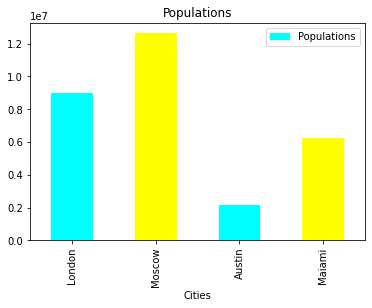

In [58]:
fig = pop_df.plot.bar(x='Cities', y='Populations', color=['cyan','yellow'], title='Populations')

> A final touch would be to sort by populaion and chart after

In [59]:
pop_df = pop_df.sort_values('Populations')

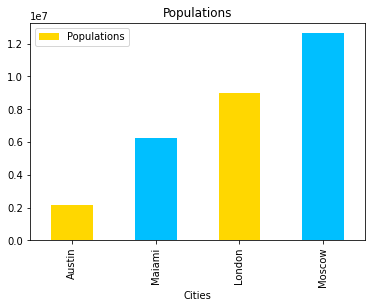

In [60]:
fig = pop_df.plot.bar(x='Cities', y='Populations', color=['gold','deepskyblue'], title='Populations')

# Part 2. Functions and lamdas in Pandas

The easiest way to put Pandas and functions together is to look at Pandas method `.apply()`

In [24]:
df2

,Fruits,Amount
0,apple,3
1,banana,5
2,tomato,6


In [25]:
df2['Fruits'].apply(lambda fruit: fruit[::-1])

0     elppa
1    ananab
2    otamot
Name: Fruits, dtype: object

In [26]:
def multiply(val):
    return val*3

In [27]:
df2['New Amount'] = df2['Amount'].apply(multiply)
df2

,Fruits,Amount,New Amount
0,apple,3,9
1,banana,5,15
2,tomato,6,18


### We can use lambda function as the first parameter to `.apply()`

In [28]:
df2['Fruits'] = df2['Fruits'].apply(lambda name: name.upper())
df2

,Fruits,Amount,New Amount
0,APPLE,3,9
1,BANANA,5,15
2,TOMATO,6,18


In [29]:
import pandas as pd

In [30]:
df = pd.read_csv('nba.csv')

In [31]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [32]:
def real_age(old_age):
    return old_age+6

In [33]:
df['Age in 2022'] = df['Age'].apply(real_age)
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Age in 2022
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,31.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0,31.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN,33.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0,28.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0,35.0
...,...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0,32.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0,30.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0,32.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0,32.0


## 🏋️🏋️ In pairs or individually:


1. Make all teams use only all capitals
2. Make all positions all smalls
3. Make positions full words (you need... a dictionary)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6cc8e273-ccff-4aba-902f-885b29543ce6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>